In [91]:
import os
import pandas as pd
print(os.getcwd())
os.chdir('C:/Users/HP/Desktop/Python scripts/logistic regressiopn')

bank_full = pd.read_csv('bank-full.csv')
bank_full.head()

bank_full.describe()
print(bank_full.isnull().sum())
bank_full.fillna(bank_full.mean(), inplace=True)
bank_full.isnull().sum()
bank_full.info()

C:\Users\HP\Desktop\Python scripts\logistic regressiopn
Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
Id           45211 non-null int64
age          45211 non-null float64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null in

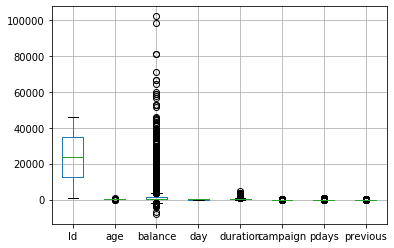

In [92]:
bank_full.boxplot()

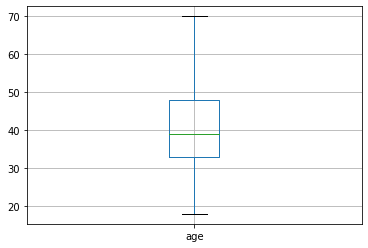

In [93]:
q1 = bank_full['age'].quantile(0.25)
q3 = bank_full['age'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.age > 1.5 * IQR + q3 , 'age'] = bank_full['age'].quantile(0.95)
bank_full.loc[bank_full.age < q1 - 1.5 * IQR , 'age'] = bank_full['age'].quantile(0.05)

bank_full.boxplot('age')

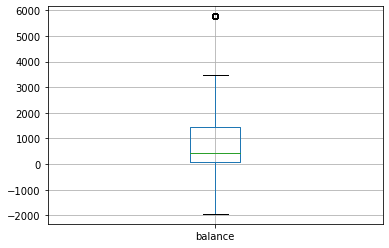

In [94]:
q1 = bank_full['balance'].quantile(0.25)
q3 = bank_full['balance'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.balance > 1.5 * IQR + q3 , 'balance'] = bank_full['balance'].quantile(0.95)
bank_full.loc[bank_full.balance < q1 - 1.5 * IQR , 'balance'] = bank_full['balance'].quantile(0.05)

bank_full.boxplot('balance')

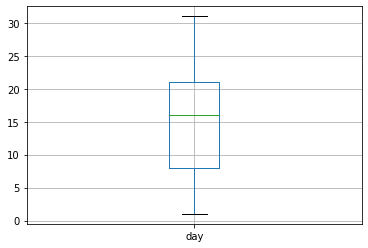

In [95]:
q1 = bank_full['day'].quantile(0.25)
q3 = bank_full['day'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.day > 1.5 * IQR + q3 , 'day'] = bank_full['day'].quantile(0.95)
bank_full.loc[bank_full.day < q1 - 1.5 * IQR , 'day'] = bank_full['day'].quantile(0.05)

bank_full.boxplot('day')

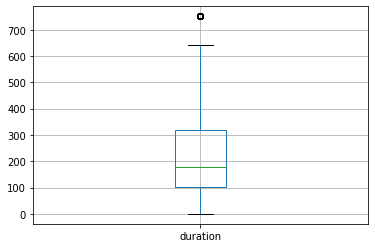

In [96]:
q1 = bank_full['duration'].quantile(0.25)
q3 = bank_full['duration'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.duration > 1.5 * IQR + q3 , 'duration'] = bank_full['duration'].quantile(0.95)
bank_full.loc[bank_full.duration < q1 - 1.5 * IQR , 'duration'] = bank_full['duration'].quantile(0.05)

bank_full.boxplot('duration')

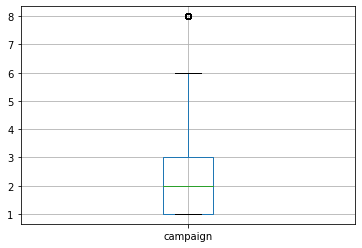

In [97]:
q1 = bank_full['campaign'].quantile(0.25)
q3 = bank_full['campaign'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.campaign > 1.5 * IQR + q3 , 'campaign'] = bank_full['campaign'].quantile(0.95)
bank_full.loc[bank_full.campaign < q1 - 1.5 * IQR , 'campaign'] = bank_full['campaign'].quantile(0.05)

bank_full.boxplot('campaign')

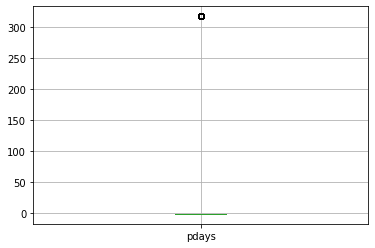

In [98]:
q1 = bank_full['pdays'].quantile(0.25)
q3 = bank_full['pdays'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.pdays > 1.5 * IQR + q3 , 'pdays'] = bank_full['pdays'].quantile(0.95)
bank_full.loc[bank_full.pdays < q1 - 1.5 * IQR , 'pdays'] = bank_full['pdays'].quantile(0.05)

bank_full.boxplot('pdays')

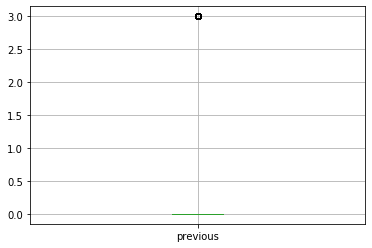

In [99]:
q1 = bank_full['previous'].quantile(0.25)
q3 = bank_full['previous'].quantile(0.75)

IQR = q3-q1



bank_full.loc[bank_full.previous > 1.5 * IQR + q3 , 'previous'] = bank_full['previous'].quantile(0.95)
bank_full.loc[bank_full.previous < q1 - 1.5 * IQR , 'previous'] = bank_full['previous'].quantile(0.05)

bank_full.boxplot('previous')

In [100]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [104]:
#removed y

X = bank_full.loc[:,['Id','age', 'balance','day','duration', 'campaign',
       'pdays', 'previous']]
calc_vif(X)

,variables,VIF
0,balance,1.395086
1,day,2.983716
2,duration,1.984507
3,campaign,2.320951
4,pdays,1.167903


In [107]:
bank_full.drop(['previous', 'Id', 'age'], axis=1, inplace=True)
bank_full

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,unknown,no
1,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,unknown,no
2,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,unknown,no
3,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,unknown,no
4,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,751.0,3.0,-1.0,unknown,yes
45207,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,unknown,yes
45208,retired,married,secondary,no,5768.0,no,no,cellular,17.0,nov,751.0,5.0,317.0,success,yes
45209,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,unknown,no


In [123]:
data = pd.get_dummies(bank_full.iloc[:,:-1])
data['y'] = bank_full.y
data

data.loc[data.y == 'no', 'y'] = 0
data.loc[data.y == 'yes', 'y'] = 1
data
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

In [132]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [129]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.229369
         Iterations: 35
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.364     
Dependent Variable:        y                     AIC:                   20821.9646
Date:                      2021-03-25 01:42      BIC:                   21179.4475
No. Observations:          45211                 Log-Likelihood:        -10370.   
Df Model:                  40                    LL-Null:               -16315.   
Df Residuals:              45170                 LLR p-value:           0.0000    
Converged:                 0.0000                Scale:                 1.0000    
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-------------------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11557   412]
 [  995   600]]


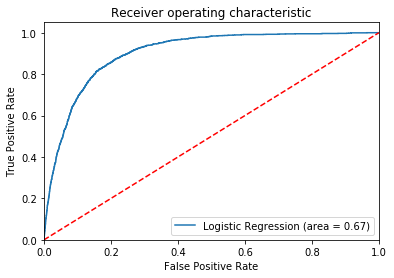

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()